# Image Classifier

## Step 0: Install & Import packages

Import TensorFlow

In [1]:
import tensorflow as tf
import os

Reduce GPU Consumption

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove dodgy images

In [3]:
import cv2

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


## Step 1: Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[1]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

The batch is label batch. Has 2 classes 1 & 0. 

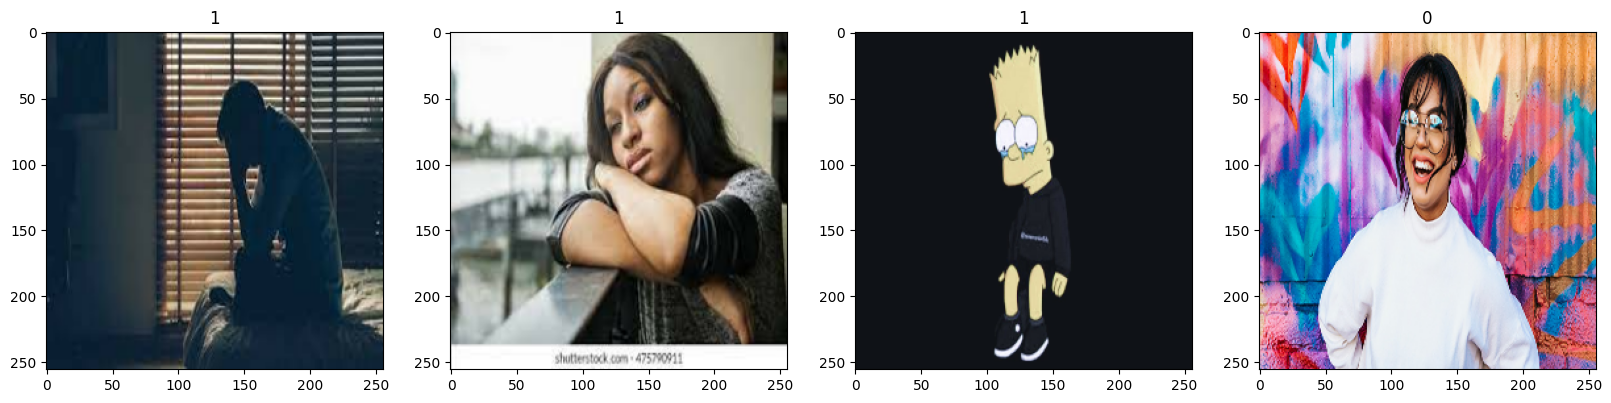

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From above we can see that:

Class 1 - Sad People

Class 0 - Happy People

## Step 2: Preprocessing The Data

### Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[9.60784316e-01, 9.10171568e-01, 6.16456032e-01],
          [9.60784316e-01, 9.10948992e-01, 6.14298046e-01],
          [9.54907715e-01, 9.31133211e-01, 6.95593953e-01],
          ...,
          [8.72242630e-01, 5.51849723e-01, 1.70214847e-01],
          [8.93462777e-01, 6.39746070e-01, 2.41810277e-01],
          [8.88419092e-01, 6.25660598e-01, 2.22815186e-01]],
 
         [[9.59681392e-01, 9.08394635e-01, 5.85416675e-01],
          [9.62434888e-01, 9.09560740e-01, 5.96629918e-01],
          [9.60906863e-01, 9.33210790e-01, 7.17367470e-01],
          ...,
          [8.87639761e-01, 6.18024290e-01, 2.24833414e-01],
          [9.08948004e-01, 7.09985852e-01, 3.64583343e-01],
          [9.11703408e-01, 7.23977506e-01, 3.72935802e-01]],
 
         [[9.60784316e-01, 9.05882359e-01, 5.59742630e-01],
          [9.51732934e-01, 9.05470669e-01, 5.54428995e-01],
          [9.68627453e-01, 9.29411769e-01, 6.90376043e-01],
          ...,
          [8.92953455e-01, 6.26164198e-01, 2.3768

### Splitting the data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## Data Modeling

### Build Deep Learning Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Train

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 666ms/step - loss: 1.1230 - accuracy: 0.5491 - val_loss: 0.6679 - val_accuracy: 0.6406
Epoch 2/20
7/7 [==============================] - 5s 655ms/step - loss: 0.6502 - accuracy: 0.6786 - val_loss: 0.6126 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 5s 666ms/step - loss: 0.5840 - accuracy: 0.7054 - val_loss: 0.4829 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 5s 635ms/step - loss: 0.4823 - accuracy: 0.8304 - val_loss: 0.4415 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 5s 632ms/step - loss: 0.4399 - accuracy: 0.8304 - val_loss: 0.3386 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 5s 650ms/step - loss: 0.3430 - accuracy: 0.8661 - val_loss: 0.3282 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 5s 656ms/step - loss: 0.3114 - accuracy: 0.8839 - val_loss: 0.2095 - val_accuracy: 0.9375
Epoch 8/20
7/7 [====

### Plot Performance

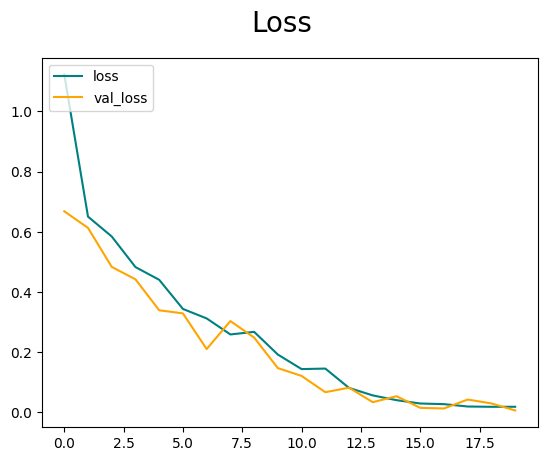

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

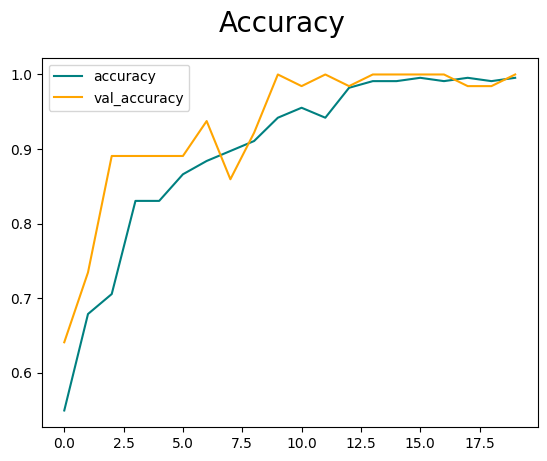

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate Performance

### Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 116ms/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Testing the Data

In [31]:
import cv2

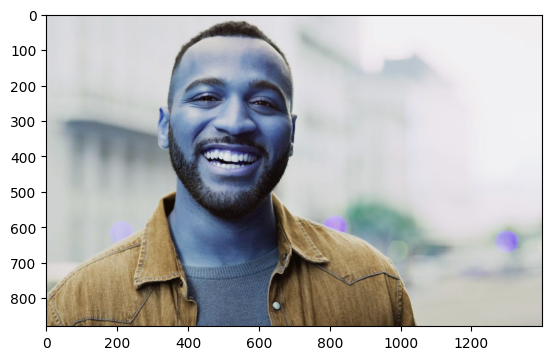

In [33]:
img = cv2.imread('HEHE.jpg')
plt.imshow(img)
plt.show()

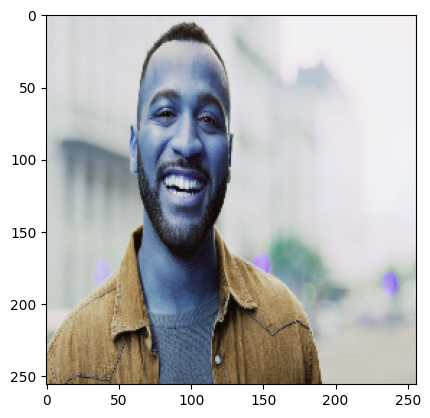

In [34]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [36]:
yhat

array([[0.00878827]], dtype=float32)

In [37]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## Save The Model

In [38]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('models/imageclassifier.h5')

In [48]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [49]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
